# 1) Integración numérica

## Regla  del Trapecio

Queremos resolver la integral

\begin{equation}
I(a,b) = \int_a^b f(x) dx
\end{equation}

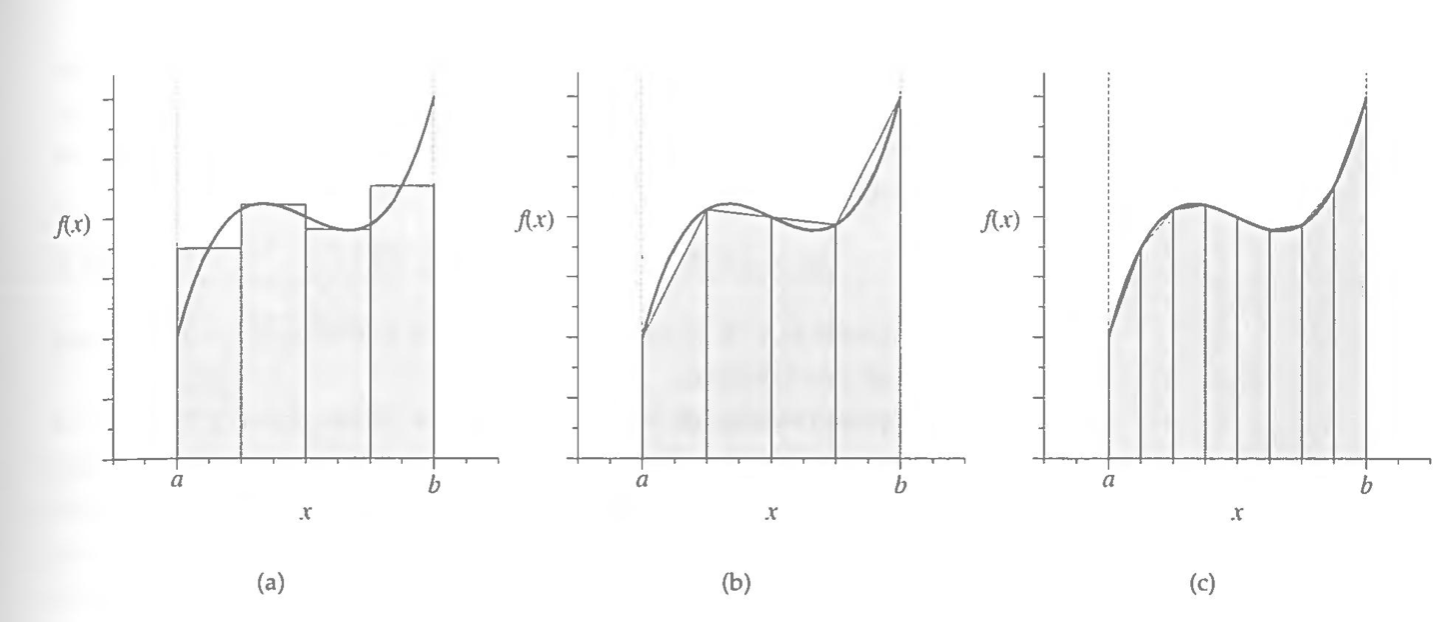

La fórmula de la regla del trapecio es la siguiente:

\begin{equation}
I(a,b) \approx \sum_{k=1}^N A_k =h \left [ \frac{1}{2} f(a) + \frac{1}{2} f(b) + \sum_{k=1}^{N-1} f(a+kh) \right]
\end{equation}

### Error del método del trapecio

\begin{equation}
\epsilon = \frac{1}{12}h^2 \left [ f^\prime(a)-f^\prime(b) \right ]
\end{equation}

In [6]:
import numpy as np

In [24]:
def trapecio(a, b, f, N):
    h = (b - a)/N
    Iab = 0.5 * (f(a) + f(b))
    for k in range(1, N):
        Iab += f(a + k*h)
    return h * Iab

Función y límites

In [8]:
def funcion1(x):
    return x**4-2*x+1
a = 0
b = 2

In [9]:
funcion1 = lambda x: x**4-2*x+1 #para funciones de una sola línea lambda funciona igual

In [10]:
funcion1(2)

13

In [33]:
Iexacto = 4.4 #Valor excacto

In [35]:
a = 0
b = 2
N = 10
funcion = lambda x: x**4 - 2*x + 1

res1 = trapecio(a, b, funcion, N)
res2 = trapecio(a, b, funcion, 100)

e1 = np.abs((res1 - Iexacto)/abs(Iexacto))
e2 = np.abs((res2 - Iexacto)/abs(Iexacto))

print("Resultado con N = 10:\n", res1, "\nResultado con N = 100:\n", res2)
print("Error absoluto con N = 10:\n", e1, "\nError absoluto con N = 100:\n", e2)

Resultado con N = 10:
 4.50656 
Resultado con N = 100:
 4.401066656
Error absoluto con N = 10:
 0.024218181818181812 
Error absoluto con N = 100:
 0.00024242181818179273


Solucion del prof

In [52]:
Res = {}
ListaN = [10, 100, 1000, 10000, 100000, 100000]
for N in ListaN:
    I = trapecio(a, b, funcion, N)
    E = np.abs(I-Iexacto)
    lista = [I, E, E/Iexacto*100]
    Res[N] = lista
Res

{10: [4.50656, 0.10655999999999999, 2.4218181818181814],
 100: [4.401066656, 0.0010666559999998881, 0.024242181818179272],
 1000: [4.400010666665601, 1.0666665600567171e-05, 0.0002424242181947084],
 10000: [4.400000106666671, 1.0666667105141414e-07, 2.4242425238957757e-06],
 100000: [4.400000001066634, 1.0666338923215335e-09, 2.4241679370943938e-08]}

In [53]:
Res[100]

[4.401066656, 0.0010666559999998881, 0.024242181818179272]

In [17]:
import matplotlib.pyplot as plt

In [54]:
Eabs = [Res[N] for N in ListaN]
Eabs

[[4.50656, 0.10655999999999999, 2.4218181818181814],
 [4.401066656, 0.0010666559999998881, 0.024242181818179272],
 [4.400010666665601, 1.0666665600567171e-05, 0.0002424242181947084],
 [4.400000106666671, 1.0666667105141414e-07, 2.4242425238957757e-06],
 [4.400000001066634, 1.0666338923215335e-09, 2.4241679370943938e-08],
 [4.400000001066634, 1.0666338923215335e-09, 2.4241679370943938e-08]]

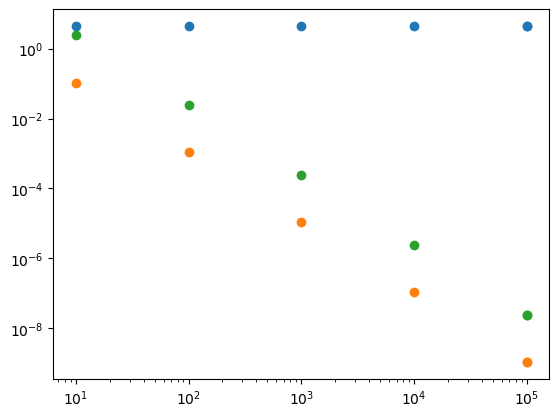

In [55]:
plt.loglog(ListaN, Eabs, 'o')


## Método de Simpson

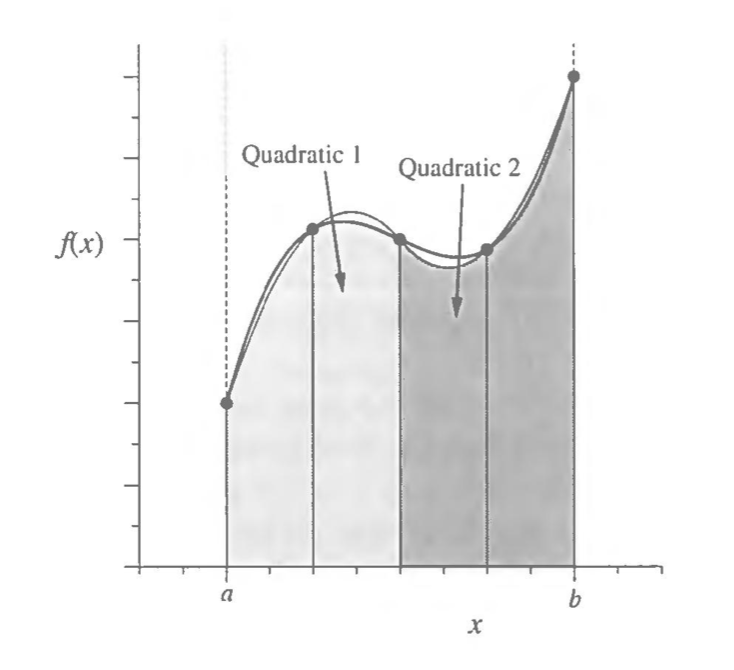

\begin{equation}
I(a,b) = \frac{1}{3}h [ f(a)+f(b)+ 4 \sum_{\underset{impar}{k=1}}^{N-1}f(a+kh) + 2 \sum_{\underset{par}{k=2}}^{N-2}f(a+kh)]
\end{equation}

### Error del método del Simpson

\begin{equation}
\epsilon = \frac{1}{90}h^4 \left [ f^{\prime\prime\prime}(a)-f^{\prime\prime\prime}(b) \right ]
\end{equation}

In [7]:
def Simpson(a, b, f, N):
    if N % 2 != 0:
        print("N debe ser un número par")
        exit()
    
    h = (b - a) / N
    sum1 = f(a) + f(b)
    sum4 = 0
    sum2 = 0
    
    for k in range(1, N, 2):
        sum4 += 4 * f(a + k * h)
    
    for k in range(2, N-1, 2):
        sum2 += 2 * f(a + k * h)
    
    Iab = (h / 3) * (sum1 + sum4 + sum2)
    return Iab


In [15]:
a = 0
b = 2
N = [10, 100, 1000, 10000]

funcion = lambda x: x**4 - 2*x + 1
Iexacto = 4.4

for num in N:
    res = Simpson(a, b, funcion, num)
    e = np.abs((res - Iexacto)/abs(Iexacto))
    print("Resultado con N =", num,":\n", res)
    print("Error absoluto con N = ", num,":\n", e1)


Resultado con N = 10 :
 4.400426666666667
Error absoluto con N =  10 :
 9.696969696972666e-05
Resultado con N = 100 :
 4.400000042666668
Error absoluto con N =  100 :
 9.696969696972666e-05
Resultado con N = 1000 :
 4.400000000004267
Error absoluto con N =  1000 :
 9.696969696972666e-05
Resultado con N = 10000 :
 4.400000000000002
Error absoluto con N =  10000 :
 9.696969696972666e-05


In [42]:
Res = {}
ListaN = [10, 100, 1000, 10000]
for N in ListaN:
    I = Simpson(a, b, funcion, N)
    E = np.abs(I-Iexacto)
    lista = [I, E, E/Iexacto*100]
    Res[N] = lista
Res

{10: [4.400426666666667, 0.0004266666666667973, 0.009696969696972665],
 100: [4.400000042666668, 4.266666753238724e-08, 9.696969893724372e-07],
 1000: [4.400000000004267, 4.266809128239402e-12, 9.697293473271367e-11],
 10000: [4.400000000000002, 1.7763568394002505e-15, 4.037174635000569e-14]}

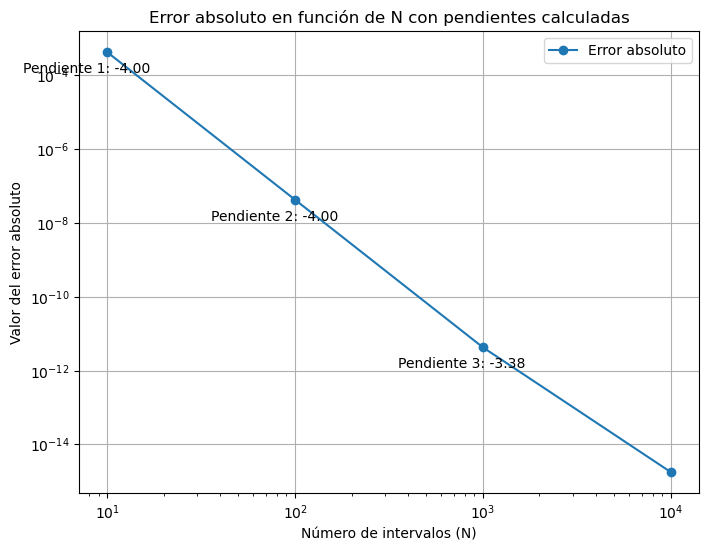

In [43]:
Eabs = [Res[N][1] for N in ListaN]

# Gráfica de error absoluto
plt.figure(figsize=(8, 6))
plt.loglog(ListaN, Eabs, 'o-', label='Error absoluto')

# Calcular las pendientes
pendientes = []
for i in range(1, len(ListaN)):
    delta_x = np.log(ListaN[i]) - np.log(ListaN[i - 1])
    delta_y = np.log(Eabs[i]) - np.log(Eabs[i - 1])
    pendiente = delta_y / delta_x
    pendientes.append(pendiente)

# Mostrar las pendientes en la gráfica
for i, pendiente in enumerate(pendientes):
    plt.annotate(f'Pendiente {i+1}: {pendiente:.2f}', (ListaN[i], Eabs[i]), textcoords="offset points", xytext=(-15,-15), ha='center')

# Etiquetas de ejes y título
plt.xlabel('Número de intervalos (N)')
plt.ylabel('Valor del error absoluto')
plt.title('Error absoluto en función de N con pendientes calculadas')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

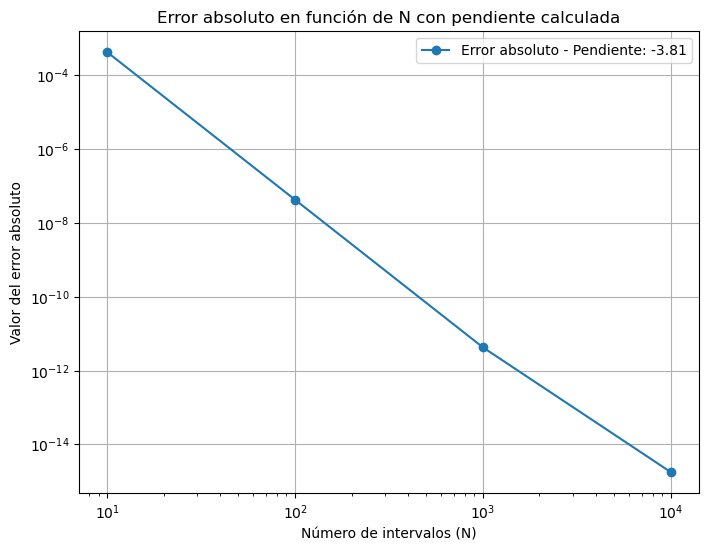

In [44]:
Eabs = [Res[N][1] for N in ListaN]

plt.figure(figsize=(8, 6))
plt.loglog(ListaN, Eabs, 'o-', label='Error absoluto')

log_N = np.log(ListaN)
log_Eabs = np.log(Eabs)
slope, intercept = np.polyfit(log_N, log_Eabs, 1)
pendiente = slope

leyenda = f'Error absoluto - Pendiente: {pendiente:.2f}'

plt.legend([leyenda])
plt.xlabel('Número de intervalos (N)')
plt.ylabel('Valor del error absoluto')
plt.title('Error absoluto en función de N con pendiente calculada')
plt.grid(True)
plt.show()

## Método de Romberg

In [1]:
from IPython.display import IFrame
IFrame("Análisis numérico_ Python .pdf", width=800, height=800)

In [2]:
from IPython.display import IFrame
IFrame("Romberg Esquema.png", width=800, height=800)

In [3]:
from IPython.display import IFrame
IFrame("Romberg Esquema2.png", width=800, height=800)

# 2) Diferenciación mumérica

## Diferencias adelantadas y atrasadas

Utilizando desarrollo en serie de Taylor tenemos que:

\begin{equation}
f(x+h) = f(x) + h f^\prime(x) + \frac{h^2}{2!}f^{\prime\prime}(x) + \frac{h^3}{3!}f^{\prime\prime\prime}(x)+\cdots
\end{equation} 

Despejando la derivada en $x$ tenemos:

\begin{equation}
f^\prime(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2!}f^{\prime\prime}(x) - \frac{h^2}{3!}f^{\prime\prime\prime}(x)+\cdots
\end{equation}

Por lo tanto la diferencia adelantas como aproximación a la derivada viene dada por:
\begin{equation}
f^\prime(x) \approx \frac{f(x+h) - f(x)}{h}, \qquad \epsilon \sim \mathcal{O}(h)
\end{equation}

Utilizando desarrollo en serie de Taylor tenemos que:

\begin{equation}
f(x+h) = f(x) + h f^\prime(x) + \frac{h^2}{2!}f^{\prime\prime}(x) + \frac{h^3}{3!}f^{\prime\prime\prime}(x)+\cdots
\end{equation} 

Despejando la derivada en $x$ tenemos:

\begin{equation}
f^\prime(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}{2!}f^{\prime\prime}(x) - \frac{h^2}{3!}f^{\prime\prime\prime}(x)+\cdots
\end{equation}

Por lo tanto la diferencia adelantas como aproximación a la derivada viene dada por:
\begin{equation}
f^\prime(x) \approx \frac{f(x+h) - f(x)}{h}, \qquad \epsilon \sim \mathcal{O}(h)
\end{equation}

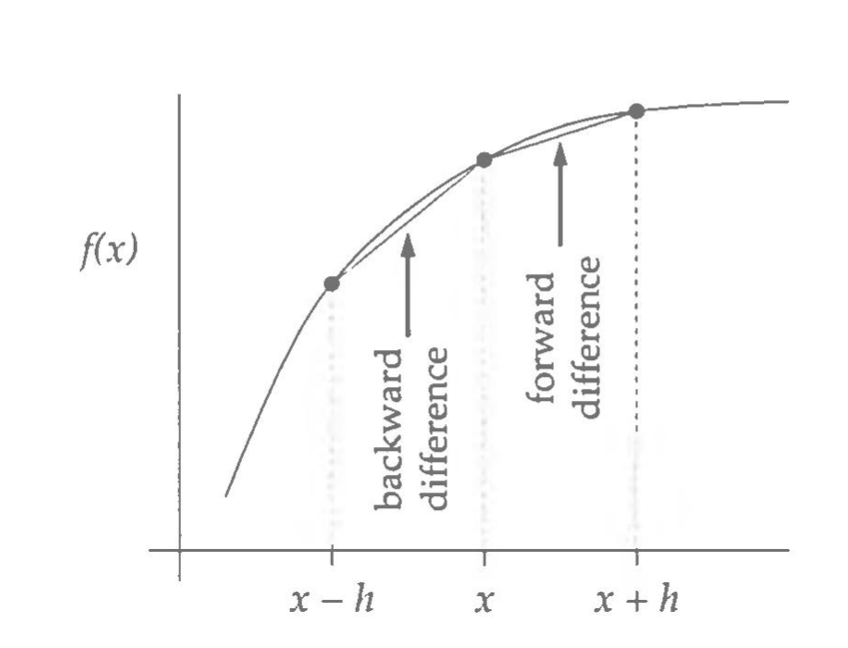

## Diferencia centrada

Restando los dos desarrollos en serie de Taylor anteriores, y despejando $f^\prime(x)$ tenemos la f\'ormula de la diferencia centrada

\begin{equation}
f^\prime(x) \approx \frac{f(x+h) - f(x-h)}{2h}, \qquad \epsilon \sim \mathcal{O}(h^2)
\end{equation}

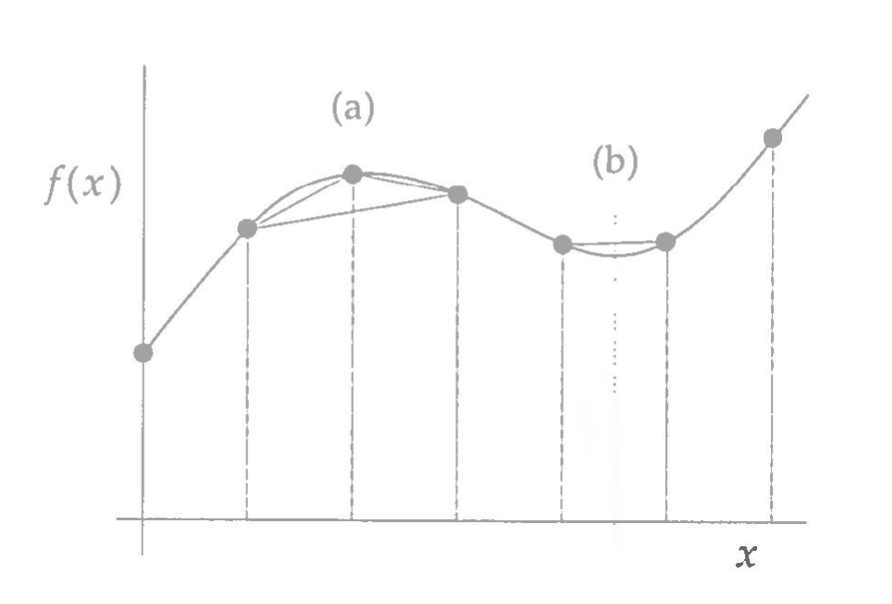

# 3) Raices de ecuaciones no lineales

## Búsqueda binaria

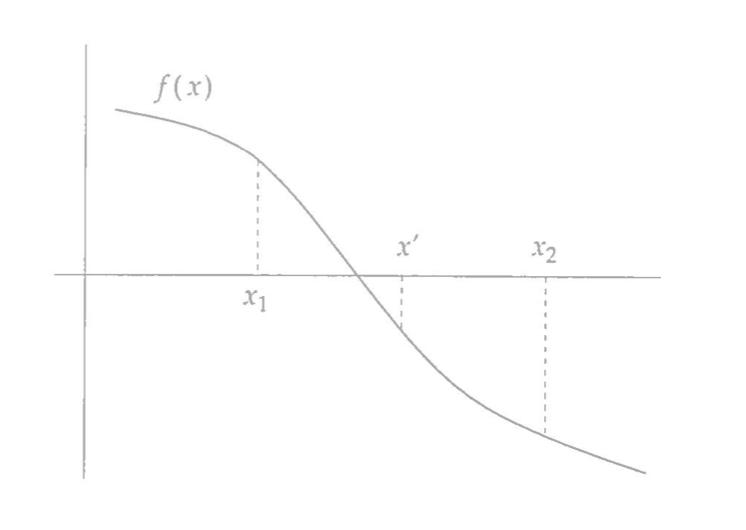

###  <font color = red > Algoritmo

1) Dado un par de puntos iniciales $x_1,x_2$, cheque si $f(x_1)$ y $f(x_2)$ tienen signos opuestos. Además proporcione la precisión deseada para su respuesta.

2) Calcule el punto medio $x^\prime = \frac{1}{2}(x_1+x_2)$ y evalúe $f(x^\prime)$

3) Si $f(x^\prime)$ tiene el mismo signo de $f(x_1)$, $x_1 = x^\prime$. En caso contrario $x_2 = x^\prime$

4) Si $|x_1-x_2|$ es mayor de la precisión deseada, repita desde el paso 2. En caso contrario, obtenga la solución de su problema calculando de nuevo $\frac{1}{2}(x_1+x_2)$


Siempre converge pero muchas veces es difícil ubicar la raíz que se desea.

## Método de Newton-Raphson

Este es un método mucho más rápido que el anterior

In [4]:
from IPython.display import IFrame
IFrame("NewtonRaphson.png", width=400, height=400)

Queremos conseguir la raíz de $f(x)$, es decir resolver $f(x) = 0$,

Supongamos que tenemos una suposición inicial $x$.Extrapolamos a una nueva suposiicón utilizando la derivada en $x$

\begin{eqnarray}
f^\prime(x) = \frac{f(x)}{\Delta x}, \quad \Delta x = x - x^\prime
\end{eqnarray}

Despejamos el nuvo valor $x^\prime$, en pirncipio más cerca de la raiz.

\begin{eqnarray}
x^\prime = x - \frac{f(x)}{f^\prime(x)}
\end{eqnarray}

Se puede demostrar que si:
\begin{eqnarray}
x = x^\star + \epsilon, \qquad \mbox{y} \qquad x^\prime = x^\star + \epsilon^\prime
\end{eqnarray}

donde $x^\star$ es la raiz exacta, que:
\begin{equation}
\epsilon^\prime = c\,\epsilon^2
\end{equation}

La convergencia es cuadrática.

<font color = red> La idea es repetir de manera sucesiva el método hasta que $|x_{new}-x_{old}| < tol$ </font>

El método no siempre converge.

In [5]:
IFrame("FallaNR.png", width=600, height=600)